In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from skimage.transform import rescale
import matplotlib.pyplot as plt
import cv2
from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D , BatchNormalization
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Age_Detection/age_gender_modified_short.csv")
print(df.head(5))
print(df.shape)

   age  ethnicity  gender                        img_name  \
0   49          1       1  20170113184406976.jpg.chip.jpg   
1   39          1       0  20170116001219696.jpg.chip.jpg   
2    8          4       0  20170103200427437.jpg.chip.jpg   
3   40          4       0  20170116213431880.jpg.chip.jpg   
4   27          0       0  20170119150234550.jpg.chip.jpg   

                                              pixels  
0  31 32 28 27 34 38 37 40 47 51 52 57 72 93 118 ...  
1  186 65 38 40 36 51 64 64 60 55 58 60 73 79 82 ...  
2  20 23 35 34 45 65 69 72 79 92 106 115 134 148 ...  
3  6 6 13 19 15 23 41 76 106 125 133 138 152 158 ...  
4  31 31 29 51 98 136 162 175 176 178 178 179 184...  
(10000, 5)


In [3]:
df = df.drop(['ethnicity', 'gender', 'img_name'], axis=1)

In [4]:
df.shape

(10000, 2)

In [5]:
df.head(5)

,age,pixels
0,49,31 32 28 27 34 38 37 40 47 51 52 57 72 93 118 ...
1,39,186 65 38 40 36 51 64 64 60 55 58 60 73 79 82 ...
2,8,20 23 35 34 45 65 69 72 79 92 106 115 134 148 ...
3,40,6 6 13 19 15 23 41 76 106 125 133 138 152 158 ...
4,27,31 31 29 51 98 136 162 175 176 178 178 179 184...


In [6]:
# from sklearn.preprocessing import StandardScaler

# # Create a StandardScaler object
# scaler = StandardScaler()

# # Fit and transform the 'age' column
# df['age_standardized'] = scaler.fit_transform(df[['age']])

# # View the standardized values
# print(df['age_standardized'])

In [7]:
df.head(5)

,age,pixels
0,49,31 32 28 27 34 38 37 40 47 51 52 57 72 93 118 ...
1,39,186 65 38 40 36 51 64 64 60 55 58 60 73 79 82 ...
2,8,20 23 35 34 45 65 69 72 79 92 106 115 134 148 ...
3,40,6 6 13 19 15 23 41 76 106 125 133 138 152 158 ...
4,27,31 31 29 51 98 136 162 175 176 178 178 179 184...


In [8]:
# import pandas as pd

# # Load the original dataset
# df1 = pd.read_csv("/content/drive/MyDrive/Age_Detection/age_gender_modified_short.csv")

# # Randomly sample 1000 rows from the dataset
# df_sample = df1.sample(n=5000, random_state=42)

# # Save the new dataset to a CSV file
# df_sample.to_csv("random_sample.csv", index=False)

In [9]:
# Define the age group bins and labels
bins= [0,6,13,19,26,36,46,56,66,76,130]
labels = ['0-5','6-12','13-18','19-25','26-35','36-45','46-55','56-65','66-75','76+']

# Cut the normalized age column into age groups and assign the labels
df['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [10]:
df.head(5)

,age,pixels,AgeGroup
0,49,31 32 28 27 34 38 37 40 47 51 52 57 72 93 118 ...,46-55
1,39,186 65 38 40 36 51 64 64 60 55 58 60 73 79 82 ...,36-45
2,8,20 23 35 34 45 65 69 72 79 92 106 115 134 148 ...,6-12
3,40,6 6 13 19 15 23 41 76 106 125 133 138 152 158 ...,36-45
4,27,31 31 29 51 98 136 162 175 176 178 178 179 184...,26-35


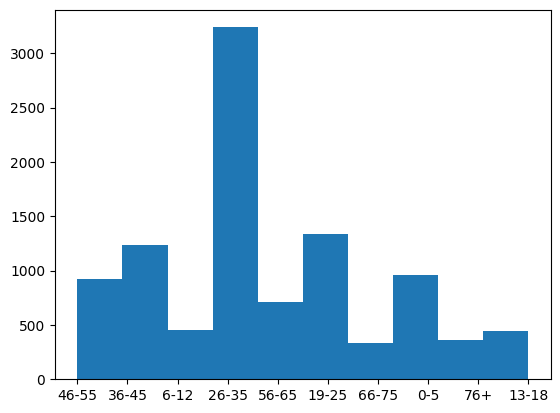

In [11]:
plt.hist(df['AgeGroup'])
plt.show()

In [12]:
print(df[df['AgeGroup']=="19-25"].describe())
print(df[df['AgeGroup']=="36-45"].describe())

               age
count  1338.000000
mean     22.955904
std       1.762316
min      19.000000
25%      22.000000
50%      23.000000
75%      24.000000
max      25.000000
               age
count  1239.000000
mean     40.054883
std       2.986814
min      36.000000
25%      38.000000
50%      40.000000
75%      42.000000
max      45.000000


In [13]:
print(df['AgeGroup'].value_counts())

26-35    3238
19-25    1338
36-45    1239
0-5       959
46-55     921
56-65     707
6-12      452
13-18     446
76+       365
66-75     335
Name: AgeGroup, dtype: int64


In [14]:
features = ["pixels"]
target_age = ["AgeGroup"]

In [15]:
x = np.zeros((df.shape[0], 48**2))
for i in range(len(x)):
    x[i,:] = df[features].loc[i][0].split()

x1 = x.reshape(df.shape[0], -48, 48, 1)

x2 = np.zeros((df.shape[0], 100, 100, 1))

In [16]:
for i in range(len(x1)):
    x2[i] = cv2.resize(x1[i],(100,100),interpolation=cv2.INTER_LINEAR).reshape(100,100,1)

In [17]:
y= df[target_age]

In [18]:
x_train, x_val, y_train, y_val = train_test_split(x2 / 255.0, y, random_state=42, test_size=0.3)

In [19]:
print("y_val is : ")
print(y_val)

y_val is : 
     AgeGroup
6252    36-45
4684    19-25
1731      0-5
4742    56-65
4521    19-25
...       ...
8014    26-35
1074      0-5
3063    26-35
6487     6-12
4705    26-35

[3000 rows x 1 columns]


(100, 100, 1)
Age:  6-12


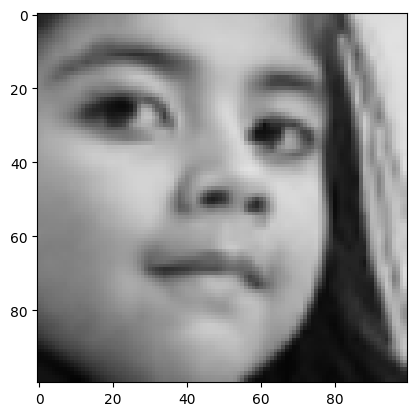

(100, 100, 1)
Age:  36-45


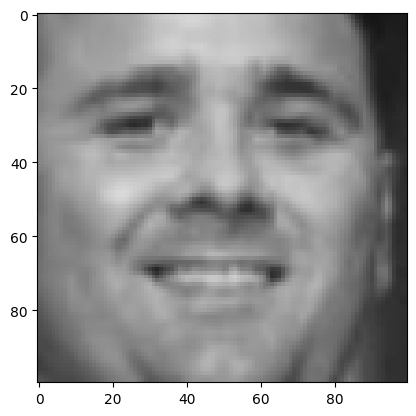

(100, 100, 1)
Age:  0-5


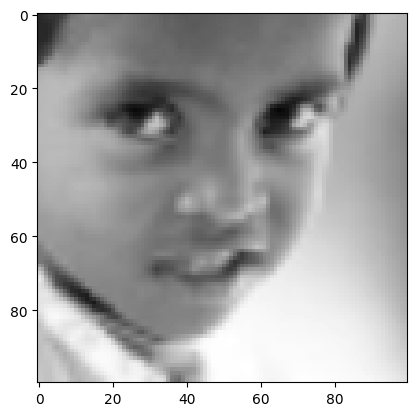

(100, 100, 1)
Age:  56-65


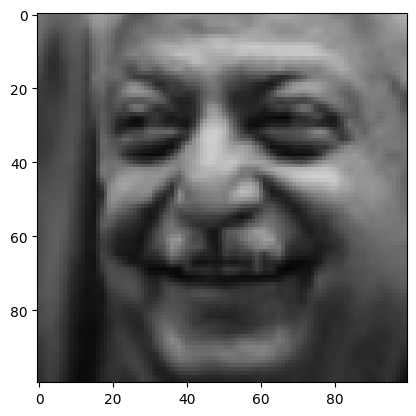

(100, 100, 1)
Age:  36-45


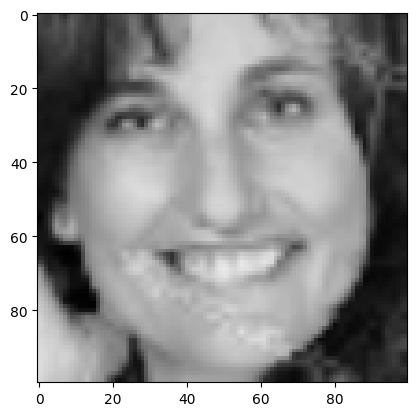

In [20]:
import matplotlib.image as img

for j in [0, 10, 300, 52, 445]:
    arr = np.asarray(np.array(x_train[j]))
    print(arr.shape)
    print("Age: ",  y_train["AgeGroup"].iloc[j])
    plt.imshow(arr, cmap='gray', vmin=0, vmax=1)
    plt.show()

In [21]:
# define the model
model = Sequential()

# first convolutional layer with batch normalization
model.add(Conv2D(64, kernel_size=(10,10), input_shape=(100, 100, 1), activation='relu'))
model.add(BatchNormalization())

# second convolutional layer with batch normalization
model.add(Conv2D(128, kernel_size=(7,7), activation='relu'))
model.add(BatchNormalization())

# third convolutional layer with batch normalization
model.add(Conv2D(256, kernel_size=(5,5), activation='relu'))
model.add(BatchNormalization())


model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

# first dense layer with batch normalization
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())

# second dense layer with batch normalization
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.25))

# output layer
model.add(Dense(10, activation='softmax'))

# print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 91, 91, 64)        6464      
                                                                 
 batch_normalization (BatchN  (None, 91, 91, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 128)       401536    
                                                                 
 batch_normalization_1 (Batc  (None, 85, 85, 128)      512       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 81, 81, 256)       819456    
                                                                 
 batch_normalization_2 (Batc  (None, 81, 81, 256)      1

In [27]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="categorical_crossentropy", optimizer= opt, metrics=["accuracy"])

In [28]:
from keras.callbacks import ModelCheckpoint
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
mcp_save = ModelCheckpoint('age_predictor.h5', save_best_only=True, monitor='val_loss', mode='min')

In [30]:
history = model.fit(x=x_train, y=pd.get_dummies(y_train["AgeGroup"]), batch_size=16, validation_split=0.2,epochs=10, callbacks=[callback, mcp_save])

Epoch 1/10
350/350 [==============================] - 44s 127ms/step - loss: 1.3754 - accuracy: 0.4709 - val_loss: 1.5523 - val_accuracy: 0.4329
Epoch 2/10
350/350 [==============================] - 43s 124ms/step - loss: 1.2688 - accuracy: 0.5152 - val_loss: 1.6127 - val_accuracy: 0.3757
Epoch 3/10
350/350 [==============================] - 45s 128ms/step - loss: 1.2065 - accuracy: 0.5339 - val_loss: 1.5686 - val_accuracy: 0.4443
Epoch 4/10
350/350 [==============================] - 60s 172ms/step - loss: 1.2706 - accuracy: 0.5082 - val_loss: 1.5011 - val_accuracy: 0.4371
Epoch 5/10
350/350 [==============================] - 44s 126ms/step - loss: 1.2017 - accuracy: 0.5366 - val_loss: 1.5822 - val_accuracy: 0.4479
Epoch 6/10
350/350 [==============================] - 53s 151ms/step - loss: 1.1413 - accuracy: 0.5530 - val_loss: 1.4251 - val_accuracy: 0.4564
Epoch 7/10
350/350 [==============================] - 45s 128ms/step - loss: 1.0526 - accuracy: 0.5875 - val_loss: 2.1328 - val_ac

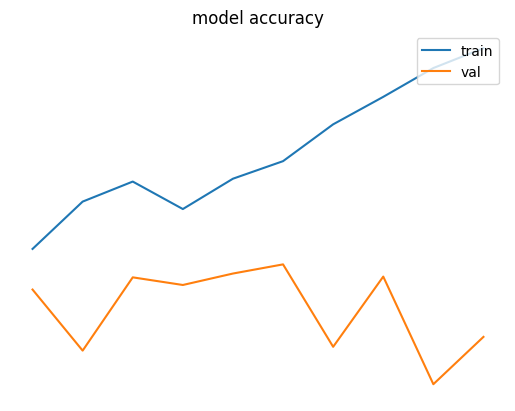

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.axis("off")
plt.show()

In [32]:
model.load_weights("./age_predictor.h5")

model.evaluate(x_val, pd.get_dummies(y_val["AgeGroup"]))

94/94 [==============================] - 9s 62ms/step - loss: 1.4359 - accuracy: 0.4493


[1.4358532428741455, 0.4493333399295807]

In [33]:
import pickle

In [34]:
# Save the model to a pickle file
with open("age_predictor.pkl", "wb") as file:
    pickle.dump(model, file)

In [35]:
# Load and preprocess the image
img_path = "/content/drive/MyDrive/Age_Detection/childimg.jpg"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img_resized = cv2.resize(img, (100, 100), interpolation=cv2.INTER_LINEAR)
img_preprocessed = img_resized.reshape(1, 100, 100, 1) / 255.0

# Use the model to predict the age group
age_group_prob = model.predict(img_preprocessed)
age_group = labels[age_group_prob.argmax()]

# Print the predicted age group
print("Predicted age group:", age_group)

1/1 [==============================] - 1s 661ms/step
Predicted age group: 26-35


In [22]:
pip install flask-ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
cd /content/drive/MyDrive/Age_Detection

/content/drive/MyDrive/Age_Detection


In [24]:
from flask_ngrok import run_with_ngrok
from flask import Flask, request, render_template
import pickle
import numpy as np

In [25]:
from flask import Flask

In [26]:
from werkzeug.serving import run_simple

In [27]:
!curl -L -o ngrok.zip https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip && unzip ngrok.zip && rm ngrok.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 13.2M  100 13.2M    0     0  26.2M      0 --:--:-- --:--:-- --:--:-- 26.1M
Archive:  ngrok.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ngrok                   


In [28]:
!./ngrok config add-authtoken 1koq0py74OlyArtq8HJSI6N5Jqc_hg5kptQQ5JLWyE5BMjR6

NAME:
   ngrok - tunnel local ports to public URLs and inspect traffic

DESCRIPTION:
    ngrok exposes local networked services behinds NATs and firewalls to the
    public internet over a secure tunnel. Share local websites, build/test
    webhook consumers and self-host personal services.
    Detailed help for each command is available with 'ngrok help <command>'.
    Open http://localhost:4040 for ngrok's web interface to inspect traffic.

EXAMPLES:
    ngrok http 80                    # secure public URL for port 80 web server
    ngrok http -subdomain=baz 8080   # port 8080 available at baz.ngrok.io
    ngrok http foo.dev:80            # tunnel to host:port instead of localhost
    ngrok http https://localhost     # expose a local https server
    ngrok tcp 22                     # tunnel arbitrary TCP traffic to port 22
    ngrok tls -hostname=foo.com 443  # TLS traffic for foo.com to port 443
    ngrok start foo bar baz          # start tunnels from the configuration file

VERSI

In [29]:
!./ngrok authtoken 1koq0py74OlyArtq8HJSI6N5Jqc_hg5kptQQ5JLWyE5BMjR6

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [30]:
!./ngrok http 5000 &

In [ ]:
# from flask import Flask, render_template, request
# from flask_ngrok import run_with_ngrok
# import cv2
# import numpy as np
# import pickle
# from tensorflow.keras.models import load_model
# from tensorflow.keras.preprocessing import image

# # Create flask app
# app = Flask(__name__)
# run_with_ngrok(app)

# model = pickle.load(open("/content/drive/MyDrive/Age_Detection/age_predictor.pkl", "rb"))

# @app.route('/')
# def index():
#     return render_template('index.html', prediction_text="")

# @app.route('/predict_age_group', methods=['POST'])
# def predict():
#     # img = request.files['img']
#     img = image.load_img(img, target_size=(100,100))
#     img = image.img_to_array(img)/255
#     img = np.expand_dims(img, axis=0)

#     prediction = model.predict(img)
#     predicted_age_group = np.argmax(prediction)


# # Load and preprocess the image
# img = request.files['img']
# img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
# img_resized = cv2.resize(img, (100, 100), interpolation=cv2.INTER_LINEAR)
# img_preprocessed = img_resized.reshape(1, 100, 100, 1) / 255.0

# # Use the model to predict the age group
# age_group_prob = model.predict(img_preprocessed)
# age_group = labels[age_group_prob.argmax()]

# # Print the predicted age group
# print("Predicted age group:", age_group)
    
#     return render_template('result.html', age_group=predicted_age_group)

# if __name__ == '__main__':
#     app.run()

In [33]:
import os
import pickle
import cv2
import numpy as np
from flask import Flask, request, render_template

app = Flask(__name__)
run_with_ngrok(app)
# Load the model from the .pkl file
with open('/content/drive/MyDrive/Age_Detection/age_predictor.pkl', 'rb') as file:
    model = pickle.load(file)

# Initialize age group labels
bins = [0, 6, 13, 19, 26, 36, 46, 56, 66, 76, 130]
labels = ['0-5', '6-12', '13-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76+']

# Define age_group_index based on df['AgeGroup']
age_group = df['AgeGroup'].iloc[0] # extract single value from pandas Series
age_group_index = labels.index(age_group)

# Check if index being accessed is within range of labels list
if len(labels) > age_group_index >= 0:
    age_group_label = labels[age_group_index]
else:
    age_group_label = 'Unknown'


@app.route('/')
def index():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    # Load and preprocess the image
    img_file = request.files['img_path']
    img_path = os.path.join('/tmp', img_file.filename)
    img_file.save(img_path)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (100, 100), interpolation=cv2.INTER_LINEAR)
    img_preprocessed = img_resized.reshape(1, 100, 100, 1) / 255.0

    # Use the model to predict the age group
    age_group_prob = model.predict(img_preprocessed)
    age_group = labels[age_group_prob.argmax()]

    # Render the result template with the predicted age group
    return render_template('index.html', prediction_text="The Predicted age group of person using CNN model is {}".format(age_group))



MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
age_list = ['(0, 2)', '(4, 6)', '(8, 12)', '(15, 20)', '(25, 32)', '(38, 43)', '(48, 53)', '(60, 100)']
gender_list = ['Male', 'Female']

def initialize_caffe_models():
    age_net = cv2.dnn.readNetFromCaffe(
        '/content/drive/MyDrive/Age_Detection/Pretrained Model/data/deploy_age.prototxt',
        '/content/drive/MyDrive/Age_Detection/Pretrained Model/data/age_net.caffemodel')

    gender_net = cv2.dnn.readNetFromCaffe(
        '/content/drive/MyDrive/Age_Detection/Pretrained Model/data/deploy_gender.prototxt',
        '/content/drive/MyDrive/Age_Detection/Pretrained Model/data/gender_net.caffemodel')

    return (age_net, gender_net)

def detect_age_gender(image, age_net, gender_net):
    face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Age_Detection/Pretrained Model/data/haarcascade_frontalface_alt.xml')

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 5)

    if len(faces) > 0:
        print("Found {} faces".format(str(len(faces))))

    results = []

    for (x, y, w, h) in faces:
        # Get Face
        face_img = image[y:y + h, x:x + w].copy()
        blob = cv2.dnn.blobFromImage(face_img, 1, (227, 227), MODEL_MEAN_VALUES, swapRB=False)

        # Predict Gender
        gender_net.setInput(blob)
        gender_preds = gender_net.forward()
        gender = gender_list[gender_preds[0].argmax()]
        print("Gender: " + gender)

        # Predict Age
        age_net.setInput(blob)
        age_preds = age_net.forward()
        age = age_list[age_preds[0].argmax()]
        print("Age Range: " + age)

        results.append((x, y, w, h, gender, age))

    return results

@app.route('/predict_pretrained', methods=['POST'])
def predict_pretrained():
    file = request.files['img_path']
    if file:
        image = cv2.imdecode(np.frombuffer(file.read(), np.uint8), cv2.IMREAD_UNCHANGED)
        age_net, gender_net = initialize_caffe_models()
        results = detect_age_gender(image, age_net, gender_net)
        age_groups = [result[5] for result in results]  # Extract the age groups from the results
        return render_template('index.html', prediction_text="The predicted age group of the person using pretrained model is: {}".format(", ".join(age_groups)))


if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://bb48-34-171-52-22.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [15/May/2023 20:28:16] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [15/May/2023 20:28:17] "GET /favicon.ico HTTP/1.1" 404 -


1/1 [==============================] - 0s 137ms/step


INFO:werkzeug:127.0.0.1 - - [15/May/2023 20:28:24] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [15/May/2023 20:28:40] "POST /predict_pretrained HTTP/1.1" 200 -


Found 1 faces
Gender: Male
Age Range: (0, 2)


INFO:werkzeug:127.0.0.1 - - [15/May/2023 20:28:58] "POST /predict_pretrained HTTP/1.1" 200 -


Found 1 faces
Gender: Male
Age Range: (0, 2)


INFO:werkzeug:127.0.0.1 - - [15/May/2023 20:29:06] "GET / HTTP/1.1" 200 -


In [34]:
!cp Age_Prediction_DL.ipynb /content/drive/MyDrive/Age_Detection

cp: cannot stat 'Age_Prediction_DL.ipynb': No such file or directory
